<a href="https://colab.research.google.com/github/daviferrarez1999/projeto5_BairesDev_DIO/blob/main/projeto5_bairesDev_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras.applications import MobileNetV2
import PIL
import io

In [123]:
model = MobileNetV2(weights='imagenet')

In [124]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [125]:
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img


In [138]:
def classify_image_and_show_names(image_path='friends.jpeg', names=['phoebe', 'chandler', 'rachel', 'ross', 'monica', 'joey']):
    img = cv2.imread(image_path)


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    faces_sorted = sorted(faces, key=lambda face: face[0])

    num_faces = len(faces_sorted)
    if num_faces != len(names):
        print(f"Erro: O número de rostos detectados ({num_faces}) é diferente do número de nomes fornecidos ({len(names)}).")
        return


    for i, (x, y, w, h) in enumerate(faces):
        name = names[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        cv2.putText(img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 0, 0), 2, cv2.LINE_AA)

    resized_img = cv2.resize(img, (224, 224))
    array_img = np.expand_dims(resized_img, axis=0)
    preprocessed_img = preprocess_input(array_img)

    predictions = model.predict(preprocessed_img)
    decoded_predictions = decode_predictions(predictions, top=3)[0]

    print("Top-3 Previsões:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i+1}: {label} ({score*100:.2f}%)")

    output_filename = '/content/friends.jpeg'
    cv2.imwrite(output_filename, img)

    display(Image(filename=output_filename))

    return output_filename

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Top-3 Previsões:
1: comic_book (32.67%)
2: ski_mask (11.23%)
3: academic_gown (8.10%)


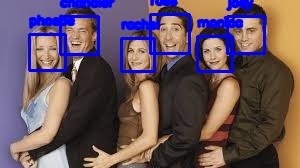

Saved to /content/friends.jpeg


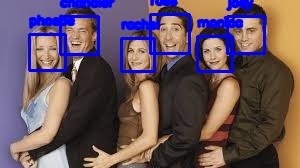

In [139]:
try:
    image_path = '/content/friends.jpeg'
    names = ['chandler', 'ross', 'joey', 'phoebe', 'rachel', 'monica']
    filename = classify_image_and_show_names(image_path, names)
    print(f'Saved to {filename}')

    display(Image(filename=filename))
except Exception as err:
    print(str(err))